### Quick Chart with Fed Projections

https://www.federalreserve.gov/monetarypolicy/files/fomcprojtabl20231213.pdf

In [1]:
# Import preliminaries
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', edgecolor='lightgray')
plt.rc('ytick',labelsize=8)
plt.rc('xtick',labelsize=8)

# Function to retrieve a series from FRED
def fred_df(series):
    url = f'http://research.stlouisfed.org/fred2/series/{series}/downloaddata/{series}.csv'
    df = pd.read_csv(url, index_col='DATE', parse_dates=True, na_values=['.'])
    return df.rename({'VALUE': series}, axis=1)

In [2]:
# Retrieve Data
srs = ['GDPC1', 'UNRATE', 'PCEPI']
df = pd.concat([fred_df(s)[s] for s in srs], axis=1)
df['GDPI'] = df['GDPC1'] / df['GDPC1'].loc['2021-01-01'] * 100
df.to_csv('series_raw.csv')
data = df.copy()
data.index.name = ''
gdp = data.loc['2021':, 'GDPI'].dropna()
unr = data.loc['2021':, 'UNRATE'].dropna()
inf = (data['PCEPI'].dropna().pct_change(12) * 100).dropna()
inf = inf.loc['2021':]

# March SEP
dt = '2023-01-01'
gdppMar = pd.Series(dtype='float')
gdppMar.loc[dt] = gdp.loc[dt]
gdppMar.loc['2023-10-01'] = df.loc['2022-10-01', 'GDPI'] * 1.004
gdppMar.loc['2024-10-01'] = gdppMar.loc['2023-10-01'] * 1.012
#gdppMar.loc['2025-10-01'] = gdppMar.loc['2024-10-01'] * 1.019
gdppMar.index = pd.to_datetime(gdppMar.index)
gdppMar = gdppMar.resample('QS').interpolate()

dt = '2023-03-01'
unrpMar = pd.Series(dtype='float')
unrpMar.loc[dt] = unr.loc[dt]
unrpMar.loc['2023-11-01'] = 4.5
unrpMar.loc['2024-11-01'] = 4.6
unrpMar.index = pd.to_datetime(unrpMar.index)

infpMar = pd.Series(dtype='float')
infpMar.loc[dt] = inf.loc[dt]
infpMar.loc['2023-11-01'] = 3.3
infpMar.loc['2024-11-01'] = 2.5
infpMar.index = pd.to_datetime(infpMar.index)

# December SEP
dt = '2023-07-01'
gdppDec = pd.Series(dtype='float')
gdppDec.loc[dt] = gdp.loc[dt]
gdppDec.loc['2023-10-01'] = df.loc['2022-10-01', 'GDPI'] * 1.026
gdppDec.loc['2024-10-01'] = gdppDec.loc['2023-10-01'] * 1.014
#gdppDec.loc['2025-10-01'] = gdppDec.loc['2024-10-01'] * 1.019
gdppDec.index = pd.to_datetime(gdppDec.index)
gdppDec = gdppDec.resample('QS').interpolate()

dt = '2023-11-01'
unrpDec = pd.Series(dtype='float')
unrpDec.loc[dt] = unr.loc[dt]
unrpDec.loc['2023-12-01'] = 3.8
unrpDec.loc['2024-11-01'] = 4.1
unrpDec.index = pd.to_datetime(unrpDec.index)

dt = '2023-10-01'
infpDec = pd.Series(dtype='float')
infpDec.loc[dt] = inf.loc[dt]
infpDec.loc['2023-11-01'] = 2.8
infpDec.loc['2024-11-01'] = 2.4
infpDec.index = pd.to_datetime(infpDec.index)

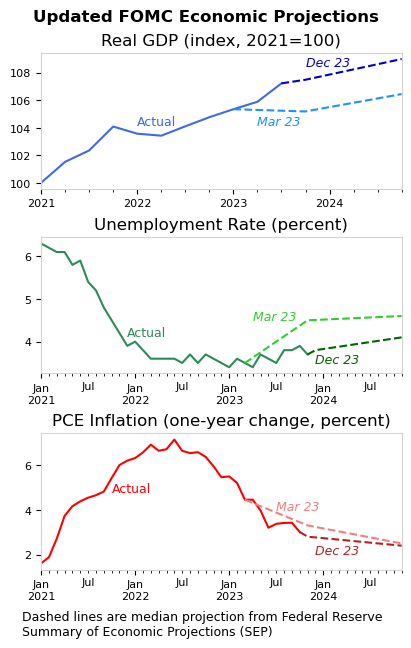

In [68]:
# Create Charts
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, 
                                    figsize=(4, 6), 
                                    constrained_layout=True)
# GDP
gdp.plot(ax=ax1, color='royalblue')
gdppMar.plot(ax=ax1, color='dodgerblue', ls='--')
gdppDec.plot(ax=ax1, color='mediumblue', ls='--')
ax1.set_title('Real GDP (index, 2021=100)')
ax1.text('2022-01-01', 104.2, 'Actual', color='royalblue', 
         size=9, ha='left')
ax1.text('2023-10-01', 108.5, 'Dec 23', color='mediumblue', 
         size=9, ha='left', style='italic')
ax1.text('2023-04-01', 104.2, 'Mar 23', color='dodgerblue', 
         size=9, ha='left', style='italic')

# Unemployment
unr.plot(ax=ax2, color='seagreen')
unrpMar.plot(ax=ax2, color='limegreen', ls='--')
unrpDec.plot(ax=ax2, color='darkgreen', ls='--')
ax2.set_title('Unemployment Rate (percent)')
ax2.text('2021-12-01', 4.12, 'Actual', color='seagreen', 
         size=9, ha='left')
ax2.text('2023-12-01', 3.5, 'Dec 23', color='darkgreen', 
         size=9, ha='left', style='italic')
ax2.text('2023-04-01', 4.5, 'Mar 23', color='limegreen', 
         size=9, ha='left', style='italic')

# PCE inflation
inf.plot(ax=ax3, color='red')
infpMar.plot(ax=ax3, color='lightcoral', ls='--')
infpDec.plot(ax=ax3, color='firebrick', ls='--')
ax3.set_title('PCE Inflation (one-year change, percent)')
ax3.text('2021-10-01', 4.8, 'Actual', color='red', 
         size=9, ha='left')
ax3.text('2023-12-01', 2.0, 'Dec 23', color='firebrick', 
         size=9, ha='left', style='italic')
ax3.text('2023-07-01', 4.0, 'Mar 23', color='lightcoral', 
         size=9, ha='left', style='italic')

fig.suptitle('Updated FOMC Economic Projections', weight='bold')
footer = ('Dashed lines are median projection from Federal Reserve\n'+
          'Summary of Economic Projections (SEP)')
fig.text(0.04, -0.05, footer, size=9)
plt.savefig('chart1.png', bbox_inches='tight')
plt.show()